In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [18]:
# 示例数据
study_labels = ['Ranning: Denmark, male', 'Ranning: Denmark, female', 
                'Gravseth: Norway, male', 'Gravseth: Norway, female', 
                'Burrell: Norway, male',  'Burrell: Norway, female', 
                ]

effect_sizes = np.array([2.22, 2.40,
                         1.62, 5.11,
                         2.72, 3.18,
                         ])
ci_low = np.array([1.76, 1.90,
                   1.00, 2.79,
                   2.21, 2.35,

                   ])
ci_high = np.array([2.80, 3.04,
                    2.60, 9.35,
                    3.34, 4.31,
                    ])


male_labels = ['Ranning: Denmark, male',
                'Gravseth: Norway, male',
                'Burrell: Norway, male',
                ]

male_effect_sizes = np.array([2.22, 
                         1.62, 
                         2.72, 
                         ])
male_ci_low = np.array([1.76,
                   1.00,
                   2.21,
                   ])
male_ci_high = np.array([2.80, 
                    2.60, 
                    3.34, 
                    ])


female_labels = ['Ranning: Denmark, female', 
                'Gravseth: Norway, female', 
                'Burrell: Norway, female', 
                ]

female_effect_sizes = np.array([2.4,
                         5.11,
                         3.18,
                         ])
female_ci_low = np.array([1.90,
                   2.79,
                   2.35,
                   ])
female_ci_high = np.array([3.04,
                    9.35,
                    4.31,
                    ])

In [19]:
# 计算权重
male_weights = 1 / ((male_ci_high - male_ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
male_weighted_effect_size = np.sum(male_weights * male_effect_sizes) / np.sum(male_weights)

# 计算标准误差
male_se_combined = np.sqrt(1 / np.sum(male_weights))

# 计算效应大小的置信区间
male_ci_low_combined = male_weighted_effect_size - 1.96 * male_se_combined
male_ci_high_combined = male_weighted_effect_size + 1.96 * male_se_combined


# 计算权重
female_weights = 1 / ((female_ci_high - female_ci_low) / (2 * 1.96))**2

# 计算加权平均效应大小
female_weighted_effect_size = np.sum(female_weights * female_effect_sizes) / np.sum(female_weights)

# 计算标准误差
female_se_combined = np.sqrt(1 / np.sum(female_weights))

# 计算效应大小的置信区间
female_ci_low_combined = female_weighted_effect_size - 1.96 * female_se_combined
female_ci_high_combined = female_weighted_effect_size + 1.96 * female_se_combined

In [20]:
female_weighted_effect_size

2.652622094515546

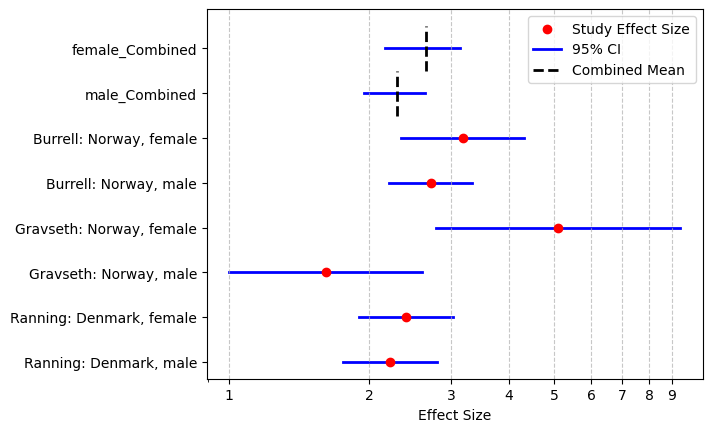

In [21]:
# 创建森林图
fig, ax = plt.subplots()

# 绘制效应大小的点
ax.scatter(effect_sizes, range(len(study_labels)), color='red', zorder=5, label='Study Effect Size')

# 绘制置信区间的线（独立研究）
for i, label in enumerate(study_labels):
    ax.plot([ci_low[i], ci_high[i]], [i, i], color='blue', linewidth=2, zorder=1)

# 绘制置信区间的线（合并效应）
ax.plot([male_ci_low_combined, male_ci_high_combined], [len(study_labels), len(study_labels)], color='blue', linewidth=2, zorder=1, label='95% CI')

# 绘制中间线
ax.plot([male_weighted_effect_size, male_weighted_effect_size], [len(study_labels) - 0.5, len(study_labels) + 0.5], color='black', linewidth=2, zorder=10, label='Combined Mean', linestyle='--')

# 绘制置信区间的线（合并效应）
ax.plot([female_ci_low_combined, female_ci_high_combined], [len(study_labels) + 1, len(study_labels) + 1], color='blue', linewidth=2, zorder=1)

# 绘制中间线
ax.plot([female_weighted_effect_size, female_weighted_effect_size], [len(study_labels) + 1 - 0.5, len(study_labels) + 1 + 0.5], color='black', linewidth=2, zorder=10, linestyle='--')

# 设置y轴标签
ax.set_yticks(range(len(study_labels) + 2))
ax.set_yticklabels(study_labels + ['male_Combined'] + ['female_Combined'])
''''''
ax.set_xscale('log')

# 手动设置刻度
xticks = [1, 2, 3, 4, 5, 6, 7, 8, 9,]  # 你希望显示的非对数刻度
ax.set_xticks(xticks)
ax.set_xticklabels([f'${val}$' for val in xticks])

# 添加网格线
ax.grid(axis='x', linestyle='--', alpha=0.7)

# 添加标签
ax.set_xlabel('Effect Size')
ax.legend()

# 显示图形
plt.show()